# EDA Analysis
**El propósito final de este análisis es definir, para el modelo de recomendación solicitado y las diferentes funciones, para cada conjunto de datos y función, las columnas y datos correspondientes que serán necesarios**.

### Durante el proceso ETL ya nos ocupamos de:

[ETL_items](01.%20ETL/ETL_items.ipynb)<br>
-   valores faltantes y limpieza de datos
-   eliminación de columnas de información irrelevante
-   eliminación de filas con información no existente o no válida
-   eliminación de valores duplicados
-   corrección de todos los tipos de datos para cada columna y dato

### Entonces en el **Análisis EDA** nos enfocaremos principalmente en:
-   búsqueda de valores atípicos
-   estadísticas y descripción de datos
-   transformación de datos
-   Variables:
    - user_id: Este user_id es el identificador único para cada uno de los usuarios en la columna de la plataforma
    - item_id: identificador único del juego en la plataforma
    - item_name: nombre del juego o aplicación
    - playtime_forever: El número total de minutos jugados "registrados"
    - playtime_2weeks: El número total de minutos jugados en las últimas 2 semanas
-   Análisis multivariable:

### Un resumen de lo que encontrarás en el cuaderno:

#### User_id
Este user_id es el identificador único para cada uno de los usuarios en la plataforma.
**Hallazgos**
- Cuántos usuarios están registrados en la plataforma

#### item_id
- Cuántos juegos son elementos en las cuentas de los usuarios
- Porcentaje del total de juegos
- Promedio de cantidad de juegos por usuario
- Los 10 elementos más vendidos (más usuarios lo tienen)
- Los 10 juegos más jugados en las últimas 2 semanas

#### Atípicos para item_id por usuario

**Hallazgos**
* La cantidad promedio de juegos por usuario es de 71 juegos
* Más del 50% de los usuarios poseen más de 40 juegos cada uno.
* Solo hay 39 usuarios con más de 2000 juegos cada uno, esto se considerará como atípicos pero representan menos del 0.056%
* La **cantidad máxima** de juegos propiedad de un usuario es de *7762 juegos*
- Los 10 elementos más vendidos (más usuarios lo tienen)

#### item_name
Este es el nombre del juego.

### playtime_forever
El número total de minutos jugados "registrados"
- 	Top 5 usuarios con más minutos jugados en total
-	Top 5 juegos con más minutos jugados
-	Promedio de minutos jugados por usuario
-	Promedio de minutos por juego

**Hallazgos**
* Los 10 mejores juegos representan aproximadamente el 41% del tiempo total de juego.
* El tiempo de juego promedio por usuario es de 1497 minutos
* El 50% de todos los usuarios juegan más de 887 minutos.
* El promedio de minutos por juego es de 277 minutos
* El 50% de los juegos se juegan durante más de 90 minutos en promedio

### playtime_2weeks
El número total de minutos jugados "registrados" en las últimas 2 semanas
- 	Top 5 usuarios con más minutos jugados en total
-	Top 5 juegos con más minutos jugados
-	Promedio de minutos jugados por usuario
-	Promedio de minutos por juego


In [1]:
import json
import os
import pandas as pd
import gzip
import ast
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns  

## Comenzamos por cargar el dataframe de parquet a pandas 

In [2]:
# Definimos el path al .parquet file
items = 'data/items.parquet'

# Leemos el .parquet file a un DataFrame
df_items = pd.read_parquet(items)

# 2.3 Items

In [3]:
df_items.head(3)

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0


In [4]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094082 entries, 0 to 5094081
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           int64 
 2   item_name         object
 3   playtime_forever  int64 
 4   playtime_2weeks   int64 
dtypes: int64(3), object(2)
memory usage: 194.3+ MB


### User_id
#### Cuantos users hay registrados en la Plataforma Steam

In [6]:
df_items['user_id'].nunique()

70912

### Item_id
- ¿Cuántos juegos del total están registrados en las cuentas de los usuarios?

In [8]:
amount_of_games_sold = df_items['item_id'].nunique()

percentage_items = round((df_items['item_id'].nunique()/22530),2)*100

print('Total amount of games sold', amount_of_games_sold)
print('This amount represents', percentage_items,'% of the total amount of games available on the platform')

Total amount of games sold 10978
This amount represents 49.0 % of the total amount of games available on the platform


- Cantidad promedio de juegos por usuario

In [9]:
# Group the DataFrame by 'user_id' and calculate the count of items per user
items_per_user = df_items.groupby('user_id')['item_id'].count()

# Calculate the average count of items per user
average_items_per_user = items_per_user.mean()

# Display the average
print("Average items per user:", average_items_per_user)

Average items per user: 71.83667080324909


In [10]:
items_per_user.describe()

count    70912.000000
mean        71.836671
std        132.366763
min          1.000000
25%         14.000000
50%         40.000000
75%         87.000000
max       7762.000000
Name: item_id, dtype: float64

* El promedio de juegos por usuario es de 71 juegos.
* Más del 50% de los usuarios poseen más de 40 juegos cada uno.
* Solo hay 39 usuarios con más de 2000 juegos cada uno, estos serán considerados valores atípicos pero representan menos del 0.056%.
* La **cantidad máxima** de juegos propiedad de un usuario es de *7762 juegos*.

#### Outliers para items_id por user

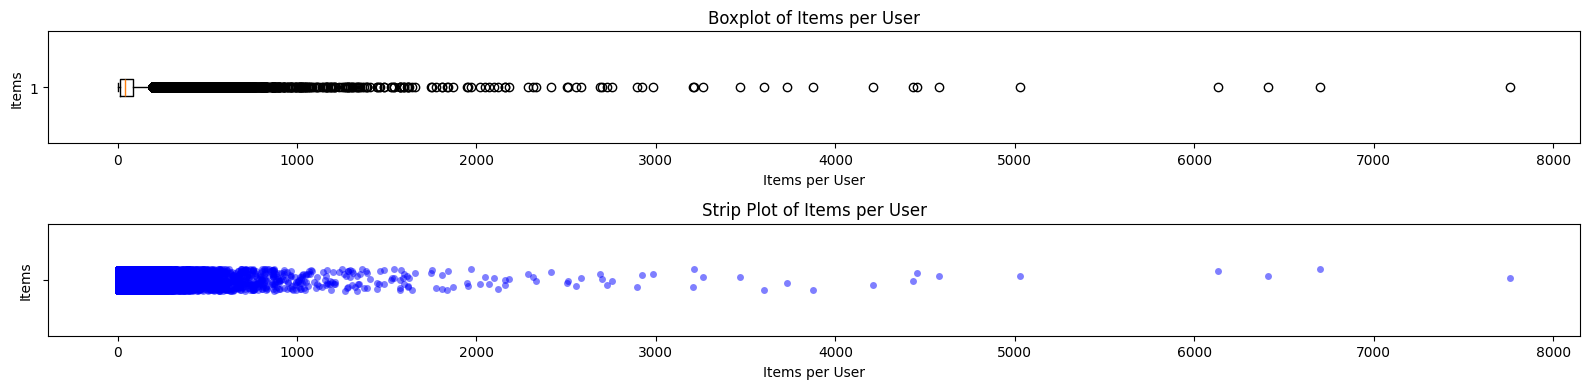

In [ ]:
# Agrupar el DataFrame por 'user_id' y calcular el conteo de elementos por usuario
elementos_por_usuario = df_elementos.groupby('user_id')['item_id'].count()

# Z-Score
z_scores = (elementos_por_usuario - elementos_por_usuario.mean()) / elementos_por_usuario.std()
valores_atípicos_zscore = elementos_por_usuario[abs(z_scores) > 3]

# Crear subtramas con dos filas y una sola columna
fig, axs = plt.subplots(2, 1, figsize=(16, 4))

# Diagrama de caja
axs[0].boxplot(elementos_por_usuario, vert=False)
axs[0].set_title('Diagrama de Caja de Elementos por Usuario')
axs[0].set_xlabel('Elementos por Usuario')
axs[0].set_ylabel('Elementos')

# Gráfico de puntos
sns.stripplot(x=elementos_por_usuario, ax=axs[1], color='blue', alpha=0.5)
axs[1].set_title('Gráfico de Puntos de Elementos por Usuario')
axs[1].set_xlabel('Elementos por Usuario')
axs[1].set_ylabel('Elementos')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()


In [ ]:
# Agrupar el DataFrame original por 'user_id' y contar el número de elementos por usuario
items_per_user = df_items.groupby('user_id')['item_id'].count().reset_index()
users_with_more_than_2000_games = items_per_user[items_per_user['item_id'] > 2000]
amount_users_morethan2000games = users_with_more_than_2000_games['item_id'].count()
print(' amount of users with more than 2000 games', amount_users_morethan2000games)
users_with_more_than_2000_games.sort_values(by='item_id', ascending=False).head()

 amount of users with more than 2000 games 39


,user_id,item_id
65868,phrostb,7762
69170,thugnificent,6700
57814,chidvd,6410
65886,piepai,6132
64104,mayshowganmore,5027


### Top 10 items mas vendidos

In [28]:
df_items['item_name'].value_counts().head(10)

item_name
Dota 2 Test                         49136
Counter-Strike: Global Offensive    43331
Garry's Mod                         42849
Unturned                            38278
Left 4 Dead 2 Beta                  36661
Left 4 Dead 2                       36661
Terraria                            28934
Warframe                            25516
Portal 2                            24206
Counter-Strike: Source              23952
Name: count, dtype: int64

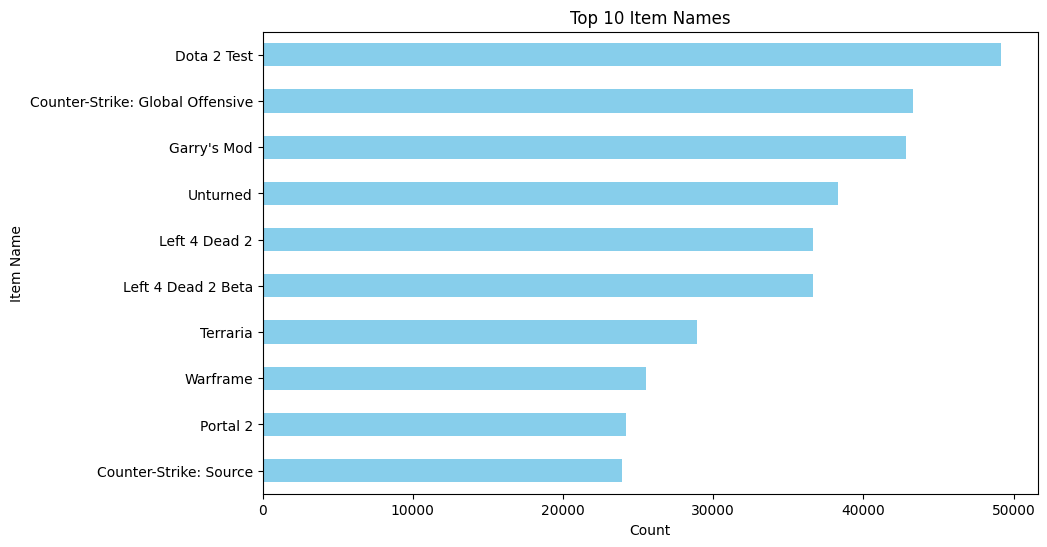

In [30]:
# Get the top 10 most common item names
top_items = df_items['item_name'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_items.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Item Names')
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.show()

### playtime_forever
El número total de minutos jugados "en registro"
#### 	Principales 5 usuarios con más minutos jugados en total

In [35]:
df_items['playtime_forever'].sum() # Cantidad total de tiempo jugada en la plataforma

5045723942

In [38]:
# Agrupar el DataFrame por 'user_id' y sumar el 'playtime_forever'
tiempo_total_por_usuario = df_elementos.groupby(['user_id', 'item_name'])['playtime_forever'].sum().reset_index()

# Calcular el tiempo total de juego
tiempo_total = df_items['playtime_forever'].sum()

# Agregar una columna con el porcentaje de tiempo de juego para cada elemento
tiempo_total_por_usuario['porcentaje_tiempo_juego'] = round((tiempo_total_por_usuario['playtime_forever'] / tiempo_total) * 100, 2)

# Mostrar el DataFrame resultante
tiempo_total_por_usuario


,user_id,item_name,playtime_forever,playtime_percentage
0,--000--,ACE - Arena: Cyber Evolution,0,0.0
1,--000--,APB Reloaded,2763,0.0
2,--000--,AdVenture Capitalist,0,0.0
3,--000--,Apotheon Arena,74,0.0
4,--000--,BLOCKADE 3D,445,0.0
...,...,...,...,...
5073721,zzzmidmiss,Wallace & Gromit Ep 2: The Last Resort,0,0.0
5073722,zzzmidmiss,Wallace & Gromit Ep 3: Muzzled!,0,0.0
5073723,zzzmidmiss,Wallace & Gromit Ep 4: The Bogey Man,0,0.0
5073724,zzzmidmiss,Warframe,10,0.0


####	Top 10 games with the most minutes played

In [41]:
# Agrupar el DataFrame por 'item_id' y 'item_name' y sumar el 'playtime_forever'
tiempo_total_por_elemento = df_items.groupby(['item_id', 'item_name'])['playtime_forever'].sum().reset_index()

# Calcular el tiempo total de juego
tiempo_total = df_items['playtime_forever'].sum()

# Agregar una columna con el porcentaje de tiempo de juego para cada elemento
tiempo_total_por_elemento['porcentaje_tiempo_juego'] = round((tiempo_total_por_elemento['playtime_forever'] / tiempo_total) * 100, 2)

# Mostrar el DataFrame resultante
tiempo_total_por_elemento.sort_values(by='playtime_forever', ascending=False).head(10)


,item_id,item_name,playtime_forever,playtime_percentage
23,730,Counter-Strike: Global Offensive,775784836,15.38
163,4000,Garry's Mod,441871026,8.76
1673,105600,Terraria,152997644,3.03
1543,72850,The Elder Scrolls V: Skyrim,134851450,2.67
2403,230410,Warframe,122726853,2.43
11,240,Counter-Strike: Source,111314706,2.21
21,550,Left 4 Dead 2,101191416,2.01
2162,218620,PAYDAY 2,98405781,1.95
326,8930,Sid Meier's Civilization V,81187409,1.61
2909,252490,Rust,80110135,1.59


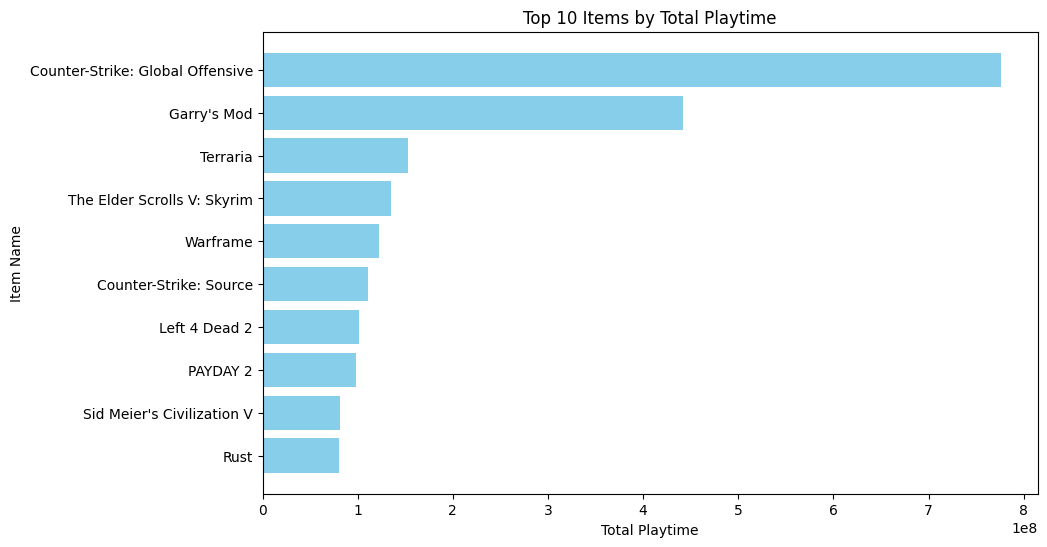

In [43]:
# Sort the DataFrame by total playtime in descending order and select the top 10 items
top_items = tiempo_total_por_elemento.sort_values(by='playtime_forever', ascending=False).head(10)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_items['item_name'], top_items['playtime_forever'], color='skyblue')
plt.xlabel('Total Playtime')
plt.ylabel('Item Name')
plt.title('Top 10 Items by Total Playtime')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

-	Average number of minutes played by user
-	Average number of minutes per game

In [52]:
# Promedoio para playtime por game
avg_playtime_by_game = df_items.groupby('item_id')['playtime_forever'].mean()
avg_playtime_by_game.describe()

count    10978.000000
mean       277.565159
std        994.862408
min          0.000000
25%         13.583924
50%         89.256609
75%        204.886803
max      38283.000000
Name: playtime_forever, dtype: float64

In [50]:
# Promedio del  playtime por  user
avg_playtime_by_user = df_items.groupby('user_id')['playtime_forever'].mean()
avg_playtime_by_user.describe()

count     70912.000000
mean       1497.533975
std        2823.894221
min           0.000000
25%         412.638020
50%         887.333333
75%        1728.892857
max      216412.000000
Name: playtime_forever, dtype: float64

* Los 10 juegos principales representan aproximadamente el 41% del tiempo total jugado.
* El tiempo promedio de juego por usuario es de 1497 minutos.
* El 50% de todos los usuarios juegan más de 887 minutos.
* El promedio de minutos por juego es de 277 minutos.
* El 50% de los juegos se juegan durante más de 90 minutos en promedio.